
# Project: The Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">limitations</a></li>
</ul>

# Dataset link
## https://www.kaggle.com/tmdb/tmdb-movie-metadata

<a id='intro'></a>
## Introduction

> First of all, I will analyze data related to movies
> - I'll ask some questions and answering them at the last :
<ul>
<li><a href="#Research Question 1">Are movies with high vote_count have high revenues?</a></li>
    <li><a href="#Conclusion 1">Conclusion 1</a></li>
<li><a href="#Research Question 2">In which year that have a higher revenues?</a></li>
    <li><a href="#Conclusion 2">Conclusion 2</a></li>
<li><a href="#Research Question 3">How long the average time for the movie is taken?</a></li>
    <li><a href="#Conclusion 3">Conclusion 3</a></li>
<li><a href="#Research Question 4">Are movies with a high budget have a high revenues?</a></li>
    <li><a href="#Conclusion 4">Conclusion 4</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

- Drop some attributes {'imdb_id' , 'cast', 'homepage','director','tagline', 'keywords','overview'
   ,'production_companies', 'revenue','budget'}
- Dealing with missing values in genres attribute by changing them into None  
- Drop the duplicates in data 
- Change type of attribute (release_date) from object to date_time


### General Properties

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
arr1 = df[df['budget_adj']==0.000000e+00].index

In [6]:
df.drop(arr1 , inplace=True)
df['budget_adj']

0        1.379999e+08
1        1.379999e+08
2        1.012000e+08
3        1.839999e+08
4        1.747999e+08
             ...     
10835    8.061618e+07
10841    5.038511e+05
10848    3.436265e+07
10855    4.702610e+06
10865    1.276423e+05
Name: budget_adj, Length: 5170, dtype: float64

In [7]:
arr2 = df[df['revenue_adj']==0.000000e+00].index

In [8]:
df.drop(arr2 , inplace=True)
df['revenue_adj']

0        1.392446e+09
1        3.481613e+08
2        2.716190e+08
3        1.902723e+09
4        1.385749e+09
             ...     
10822    2.266436e+08
10828    8.733419e+07
10829    4.030809e+07
10835    1.343603e+08
10848    8.061618e+07
Name: revenue_adj, Length: 3855, dtype: float64

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [11]:
# group exploded dataframe by genres, get average popularity
genres_df.groupby('genres').popularity.mean()

genres
Action             1.566222
Adventure          1.867693
Animation          1.710622
Comedy             1.012321
Crime              1.123152
Documentary        0.294458
Drama              1.001181
Family             1.459043
Fantasy            1.754315
Foreign            0.179608
History            0.970674
Horror             0.854005
Music              0.899005
Mystery            1.142613
Romance            0.954889
Science Fiction    1.870838
TV Movie           0.273628
Thriller           1.258400
War                1.246129
Western            1.134246
Name: popularity, dtype: float64

Text(0, 0.5, 'Genres')

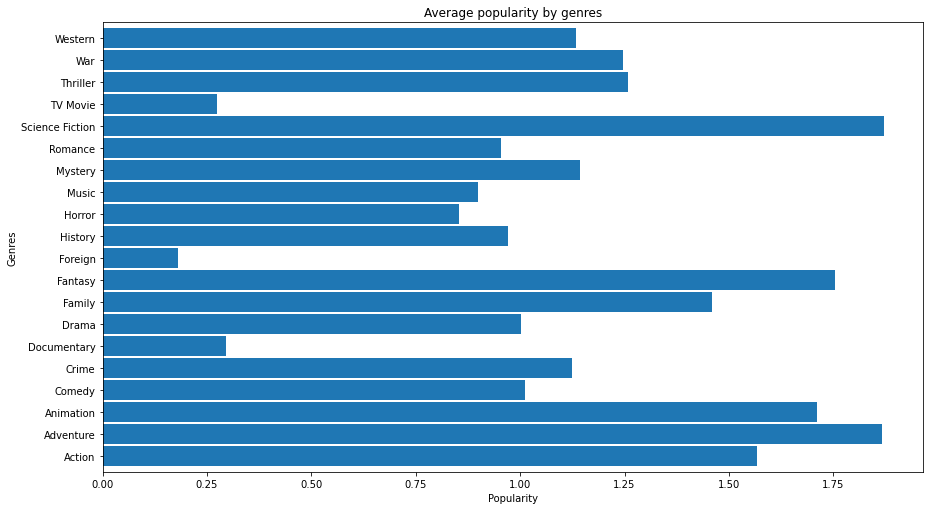

In [12]:
genres_df.groupby('genres').popularity.mean().plot.barh(x='lifespan',figsize=[14.7,8.27],width=.9)
plt.title('Average popularity by genres')
plt.xlabel('Popularity')
plt.ylabel('Genres')

In [13]:
#There are some columns we don't need them in out Data Wrangling, so we'll drop them
df.drop(['imdb_id' , 'cast', 'homepage','director','tagline', 'keywords','overview','production_companies', 'revenue','budget'],axis = 1 , inplace = True)

In [14]:
df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
#To count the number of null values in out data
df.isnull().sum()

id                0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [16]:
#Fill out missing values in column('genres') with None
df['genres'].fillna(value='None', inplace=True)

In [17]:
df.isnull().sum()

id                0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

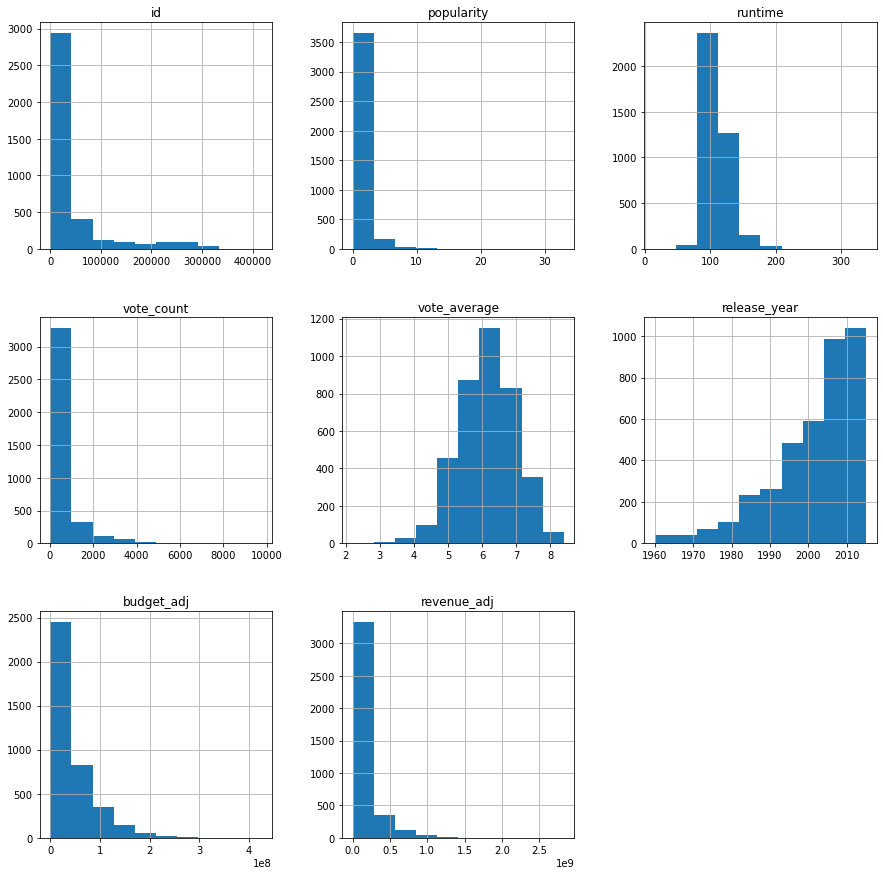

In [18]:
#Plot our data using histogram
df.hist(figsize=(15,15));

<a id='conclusions'></a>
## Conclusions

### I'll explain each of this histogram :
- (1) There are more than ten thousand movies have popularity
- (2) Most of the movies have runtime between 1 hrs to 8000 hrs
- (3) Vote average appear to be normally distributed
- (4) releas_year appear skewed to the left
- (5) Some movies like more than 10000 movies have received a higher budget and the other received a low budget
- (6) Some movies like more than 10000 movies have received a higher revenues and the other received a low revenues

In [19]:
def myScatterPlot (df,xVar,yVar): 
    # plot 
    df.plot(x=xVar, y=yVar, kind='scatter',figsize=[14, 8]);
    # Add title and format it 
    plt.title(f'relationships between {yVar} and {xVar}'.title() , fontsize = 14, weight = "bold")
    # Add x label and format it 
    plt.xlabel (xVar.title(), fontsize = 10, weight = "bold")
    # Add y label and format it 
    plt.ylabel(yVar.title(), fontsize = 10, weight = "bold")
    # don 't use scientific notation for tick labels 
    plt.ticklabel_format(style='plain', axis='y') 
    # don 't use scientific notation for tick labels
    plt.ticklabel_format (style='plain', axis='x')

<a id='Research Question 1'></a>
## Are movies with high vote_count have high revenues?

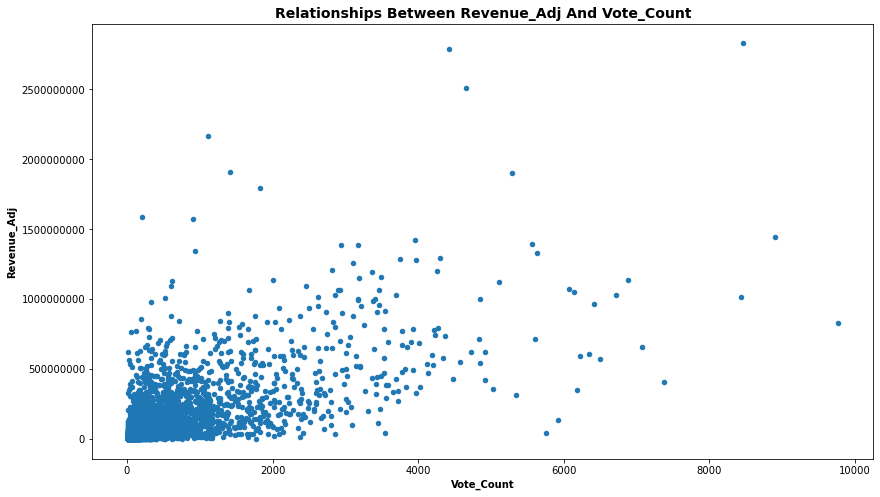

In [20]:
#call plot function
myScatterPlot(df,'vote_count','revenue_adj')

<a id='Conclusion 1'></a>
## Conclusion 1

- There's a positive correlation between vote_count and revenue_adj .
- The more vote_count, the higher revenue_adj .

<a id='Research Question 2'></a>
## In which year that have a higher revenues?

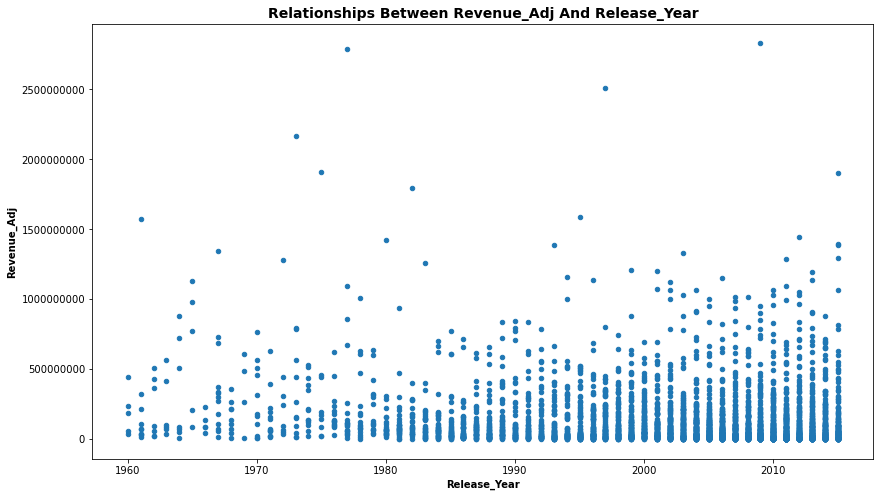

In [21]:
#call plot function
myScatterPlot(df,'release_year','revenue_adj')

<a id='Conclusion 2'></a>
## Conclusion 2

- Movies started to earn a great high revenue from and to after to after 2010

<a id='Research Question 3'></a>
## How long the average time for the movie is taken?

In [22]:
df['runtime'].describe()

count    3855.000000
mean      109.215824
std        19.922166
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

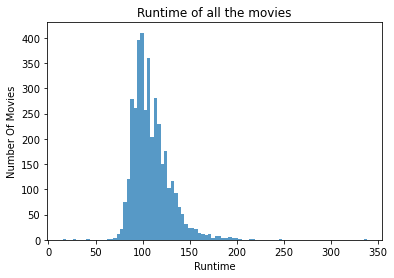

In [23]:
# histrogram for runtime 
plt.xlabel('Runtime')
plt.ylabel('Number Of Movies')
plt.title('Runtime of all the movies')
plt.hist(df['runtime'],alpha=.75,bins=90);

<a id='Conclusion 3'></a>
## Conclusion 3

- The histogram is shown to be right skewed
- The average time of movies is 102.070863 min

<a id='Research Question 4'></a>
## Are movies with a high budget have a high revenues?

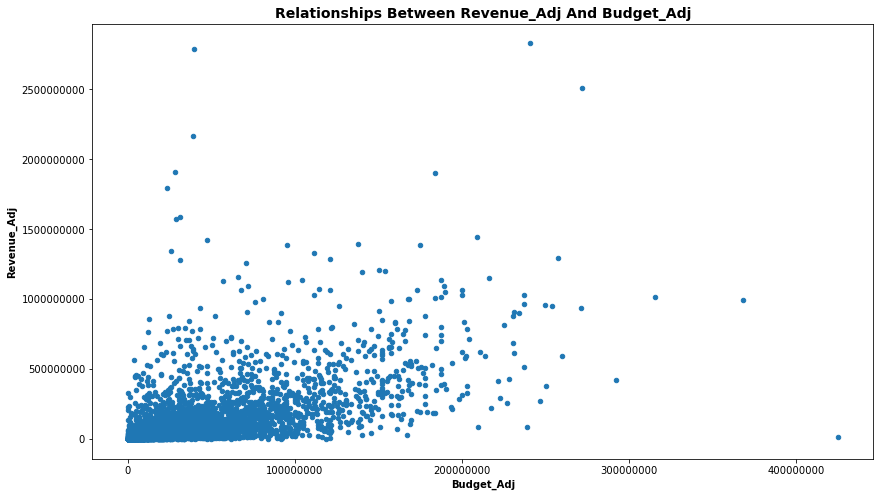

In [24]:
myScatterPlot(df,'budget_adj','revenue_adj')

<a id='Conclusion 4'></a>
## Conclusion 4

- There's a positive correlation between budget_adj and revenue_adj .
- The more budget, the higher revenue .

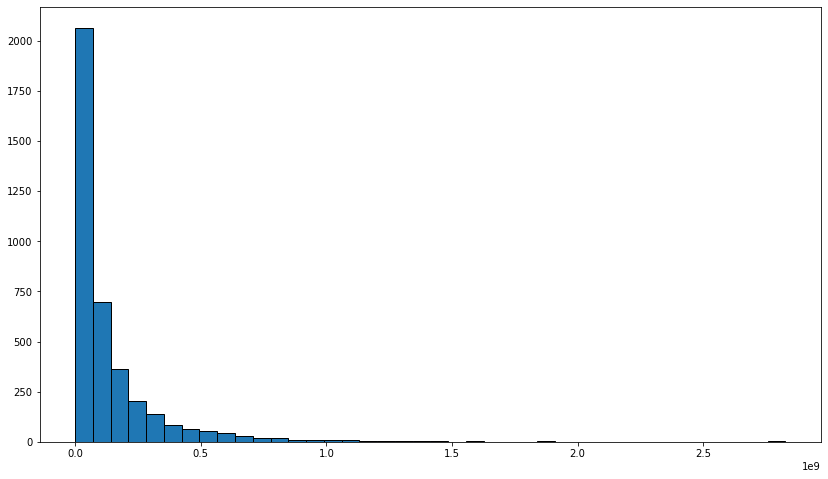

In [25]:
# 1d exploration of revenue 
df['revenue_adj'].hist(grid=False,bins=40, edgecolor='black',figsize=[14, 8]);

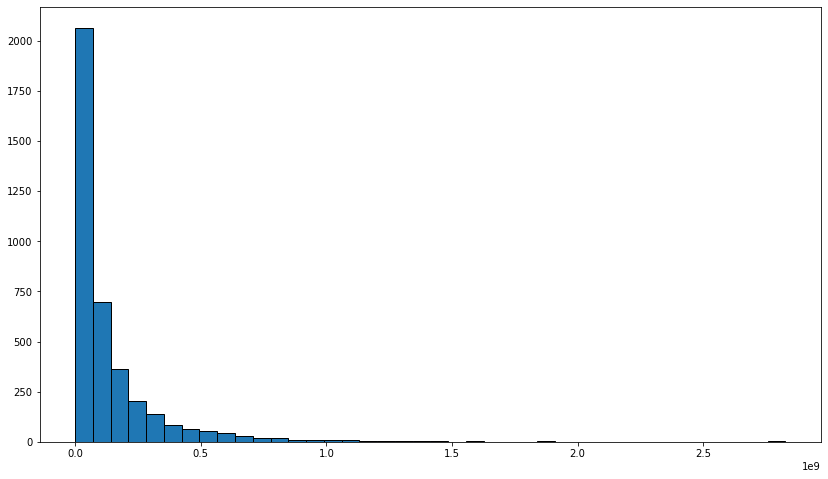

In [26]:
# 1d exploration of revenue 
df.query('revenue_adj > 0')['revenue_adj'].hist(grid=False,bins=40, edgecolor='black',figsize=[14, 8]);

<a id='limitations'></a>
## limitations

- we need to do normalization and remove the outlier in data During the data cleaning process, I dropped irrelevant attributes during. This increases the time taken in calculating the result.